# **Business Case: Yulu cycle rentel- Hypothesis Testing**

**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.*

**Column Profiling:**

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

# **Concept Used:**

Bi-Variate Analysis

2-sample t-test: testing for difference across populations

ANNOVA

Chi-square

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import levene
from statsmodels.graphics.gofplots import qqplot
import wget

In [217]:

!gdown 1qTaHlqT10HS3McUNn1Th0OnP3eYYsKLO

df = pd.read_csv('bike_sharing.csv')


Downloading...
From: https://drive.google.com/uc?id=1qTaHlqT10HS3McUNn1Th0OnP3eYYsKLO
To: C:\Users\Sundarabharathy\Desktop\Python  Projects\bike_sharing.csv

  0%|          | 0.00/648k [00:00<?, ?B/s]
 81%|########  | 524k/648k [00:00<00:00, 1.64MB/s]
100%|##########| 648k/648k [00:00<00:00, 1.55MB/s]


In [218]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [219]:
df.loc[0:5,:]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


# **To find Duplicates values**

In [220]:
df.duplicated() # it will compare row by row and gives boolean value if both the rows have same values

0        False
1        False
2        False
3        False
4        False
         ...  
10881    False
10882    False
10883    False
10884    False
10885    False
Length: 10886, dtype: bool

In [221]:
len(df[df.duplicated()]) #it will return the number of rows that has duplicates

0

**Conclusion:**

*There are no duplicates value in the data set*

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# **Change the datatype of the variables from integer to category datatype**

In [223]:
cols = ['season', 'holiday', 'workingday', 'weather']
df[cols] = df[cols].astype('category')
df.dtypes

datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

In [224]:

# Change the datetime object type to Datetime datatype
df['datetime']= pd.to_datetime(df['datetime'])
df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

## Analysis
* Based on the data provided there are no null values and all the variables are either integer or float or object data type.
                   
* Season”, “holiday”, “Weather” , “Working Day” columns datatype are integer those columns can be used as categorical variables as they contain only 0 to 4 values which are easy to perform t-test.

# **Detect the null values**

In [225]:
#Method 1 to detect the null values

df.isna().sum().sum()

0

In [226]:
#Method 2 to detect the null values

df[df.isnull().any(axis=1)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


**Conclusion:**

*Method 1 : There are no NAN values using sum() method*

*Method 2: Using any(axis=1) it will return the boolean value row wise, Since all the rows returned False boolean no rows contains NaN values*

# **Change the season categories**

In [227]:
def change_values(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
# each value from season column is passed into the chage_values function and replace the values with corresponding values

df['season'] = df['season'].apply(change_values)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


# **Find the mean of casual and registered users**

In [228]:
df[['casual','registered','count']].apply(np.mean)

casual         36.021955
registered    155.552177
count         191.574132
dtype: float64

**Conclusion:**

*Based on the average number of users*

*The registered user count is higher **155** approx when compared to the casual users **36***

# **Categorize the atemp values using the bins**

In [229]:
# Using the quantile method to identify the range of values in order to split the values as bins

atemp_category= [df['atemp'].min(),
                 df['atemp'].quantile(0.25),
                 df['atemp'].quantile(0.5),
                 df['atemp'].quantile(0.75),
                 df['atemp'].max()]

#Labels to be used for bins
atemp_labels = ['low_temp','medium_temp','high_temp','very_high']

print(f"The bin value range is :{atemp_category}")

#pd.cut() method is used to split the temperature values to bins
df['temp_category']= pd.cut(df['atemp'],bins=atemp_category,labels=atemp_labels)

df.head()

The bin value range is :[0.76, 16.665, 24.24, 31.06, 45.455]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_category
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,low_temp
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,low_temp
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,low_temp
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,low_temp
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,low_temp


# **Categorize the humidity values using the bins**

In [230]:
# Using the quantile method to identify the range of values in order to split the values as bins

humid_category= [df['humidity'].min(),
                 df['humidity'].quantile(0.25),
                 df['humidity'].quantile(0.5),
                 df['humidity'].quantile(0.75),
                 df['humidity'].max()]

#Labels to be used for bins
humid_labels = ['low_humid','medium_humid','high_humid','very_high_humid']

print(f"The bin value range is :{humid_category}")

#pd.cut() method is used to split the humidity values to bins
df['humid_category']= pd.cut(df['humidity'],bins=humid_category,labels=humid_labels)

df.head()

The bin value range is :[0, 47.0, 62.0, 77.0, 100]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_category,humid_category
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,low_temp,very_high_humid
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,low_temp,very_high_humid
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,low_temp,very_high_humid
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,low_temp,high_humid
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,low_temp,high_humid


# **Find the max and min count of users over different seasons, weather etc**

In [231]:

cols=['season','holiday','workingday','weather','temp_category','humid_category']

for i in cols:
    print(f"Based on the {i}:")
    print("*"*50)
    print(df.groupby(i,observed=False)['count'].aggregate(['min','max','sum','mean']))
    print("="*80)
    

Based on the season:
**************************************************
        min  max     sum        mean
season                              
spring    1  801  312498  116.343261
summer    1  873  588282  215.251372
fall      1  977  640662  234.417124
winter    1  948  544034  198.988296
Based on the holiday:
**************************************************
         min  max      sum        mean
holiday                               
0          1  977  2027668  191.741655
1          1  712    57808  185.877814
Based on the workingday:
**************************************************
            min  max      sum        mean
workingday                               
0             1  783   654872  188.506621
1             1  977  1430604  193.011873
Based on the weather:
**************************************************
         min  max      sum        mean
weather                               
1          1  977  1476063  205.236791
2          1  890   507160  178.955540
3   

**Conclusion**

*1. Based on the seasons **fall** season has the highest number of user*

*2. Based on the weather- **Clear, Few clouds, partly cloudy, partly cloudy** during this weather the count of user is high*

*3. Based on the working day or holiday- During **working days** the count of users are high*

*4. Based on the temperature- During **high and very high temperature** the count of users are high*

*5. Based on the humidity- During **low humidity** the count of users are high*

# **Detection of outliers**

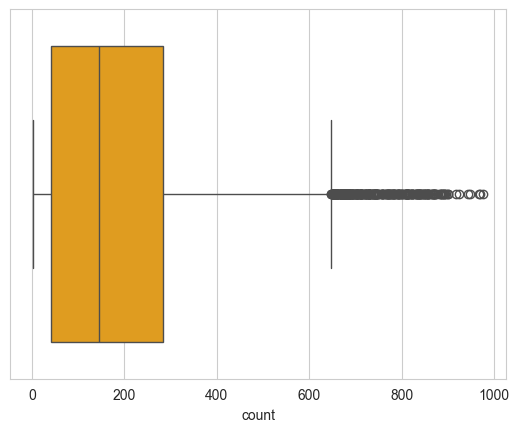

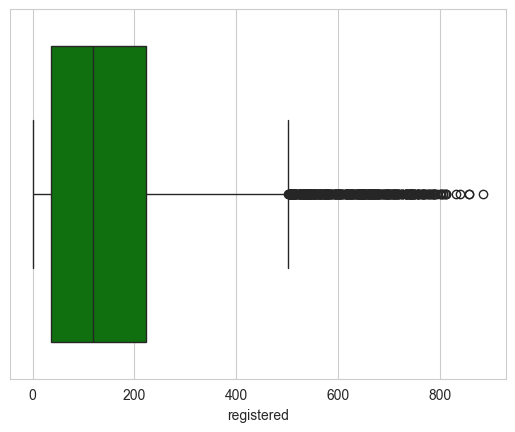

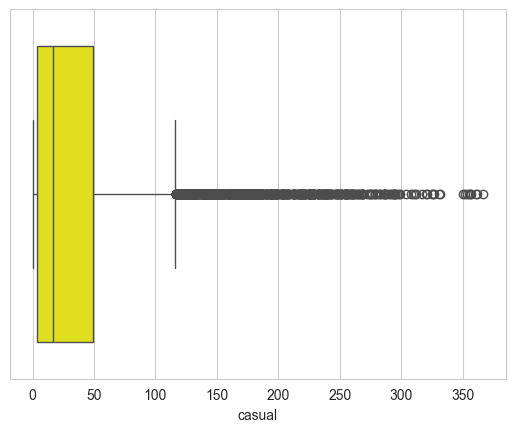

In [232]:
#For the count column
sns.set_style('whitegrid')
sns.boxplot(data=df,x='count',color='orange')
plt.show()

#For the Registered user column
sns.boxplot(data=df,x='registered',color='green')
plt.show()

#For the Casual users column
sns.boxplot(data=df,x='casual',color='yellow')
plt.show()

In [233]:
#Detect outlier using IQR- Inter quartile region

cols = ['count','registered','casual']

for i in cols:
    print(f"The deails for the total {i}:")
    print("-"*50)
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR= Q3-Q1
    print(f"Quantile 1:{Q1}\nQuantile 2:{Q3}")
    print(f"IQR:{IQR}")
    if (Q1- (1.5*IQR))>0: 
        mins=Q1- (1.5*IQR) 
    else: 
        mins=0
    maxs= Q3+ (1.5*IQR)
    print(f"The minimum value: {mins}\nThe maximum value: {maxs}")
    outliers = df[(df[i]<mins) | (df[i]>maxs)][i]

    print("number of outliers: "+ str(len(outliers)))
    print("max outlier value:"+ str(outliers.max()))
    print("min outlier value: "+ str(outliers.min()))
    print("="*70)

The deails for the total count:
--------------------------------------------------
Quantile 1:42.0
Quantile 2:284.0
IQR:242.0
The minimum value: 0
The maximum value: 647.0
number of outliers: 300
max outlier value:977
min outlier value: 648
The deails for the total registered:
--------------------------------------------------
Quantile 1:36.0
Quantile 2:222.0
IQR:186.0
The minimum value: 0
The maximum value: 501.0
number of outliers: 423
max outlier value:886
min outlier value: 502
The deails for the total casual:
--------------------------------------------------
Quantile 1:4.0
Quantile 2:49.0
IQR:45.0
The minimum value: 0
The maximum value: 116.5
number of outliers: 749
max outlier value:367
min outlier value: 117


# **Uni Varient Analysis**

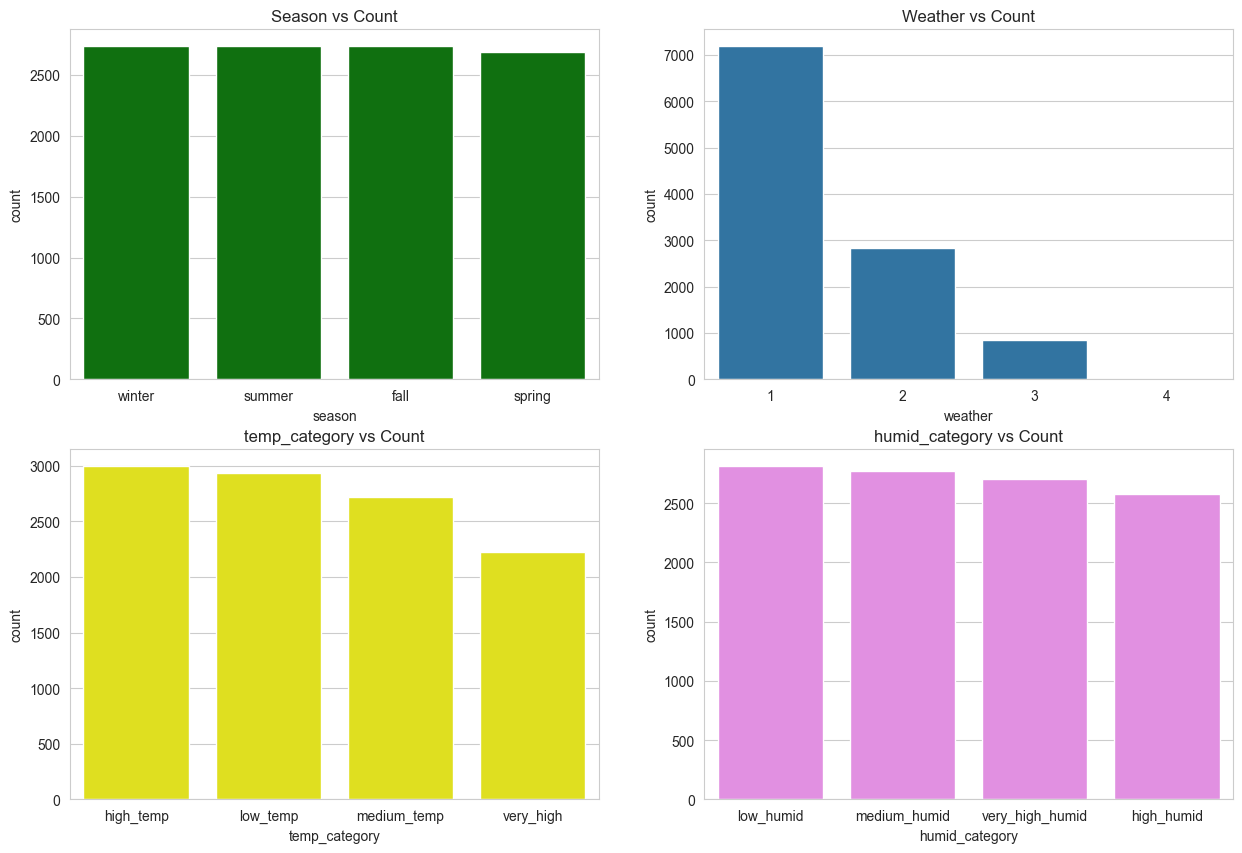

In [234]:
#Season Vs count
fig, axis= plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.countplot(data=df,x='season',ax = axis[0,0],order=df['season'].value_counts().index, color='green')

axis[0,0].set_title("Season vs Count")


# Weather vs Count
sns.countplot(data=df,x='weather',ax = axis[0,1])
#ax = plt.gca()
# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#             fontsize=12, color='black', ha='center', va='bottom')
axis[0,1].set_title("Weather vs Count")


#temp_category vs count
sns.countplot(data=df,x='temp_category',ax = axis[1,0],order=df['temp_category'].value_counts().index,color='yellow')
axis[1,0].set_title("temp_category vs Count")

#humid_category vs count
sns.countplot(data=df,x='humid_category',ax = axis[1,1],order=df['humid_category'].value_counts().index,color='violet')
axis[1,1].set_title("humid_category vs Count")

plt.show()

# **BI VARIENT ANALYSIS**


In [235]:
df.groupby('season',observed=False)['count'].sum()

season
spring    312498
summer    588282
fall      640662
winter    544034
Name: count, dtype: int64

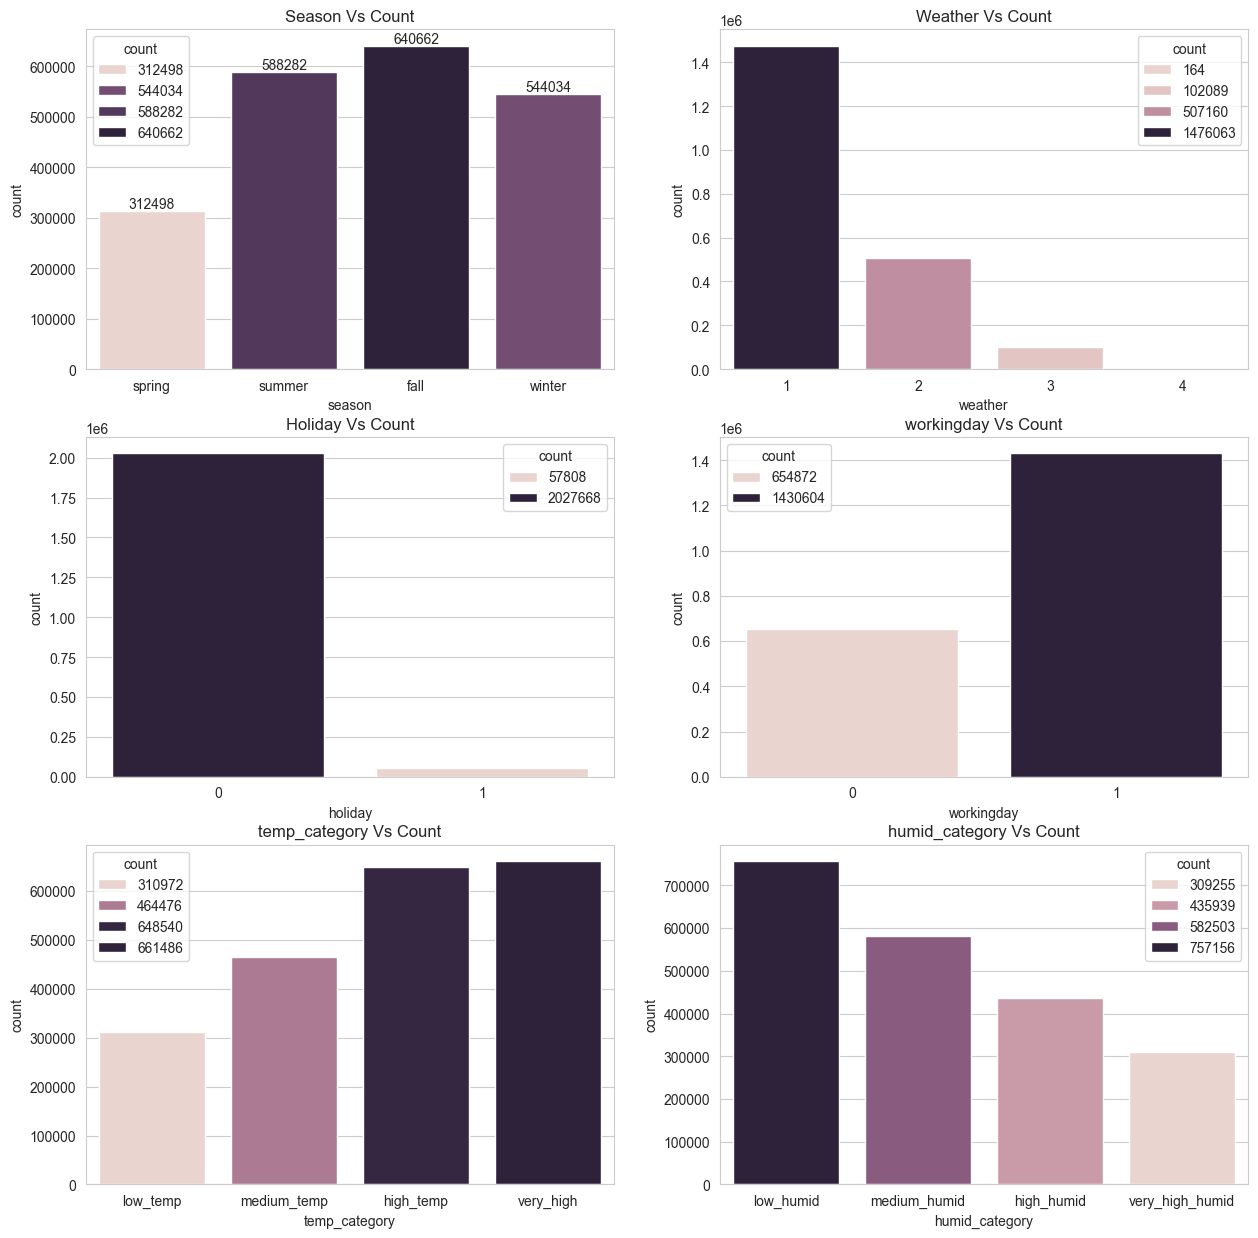

In [236]:
#Perform group by based on the season and stored as a new DataFrame

season_dff= df.groupby('season',observed=False)['count'].sum().reset_index()

fig, axis = plt.subplots(nrows=3,ncols=2,figsize=(15,15))
ax1= sns.barplot(x='season',y='count',data=season_dff,hue='count',ax=axis[0,0])
for i in ax1.containers:
    ax1.bar_label(i,)
axis[0,0].set_title("Season Vs Count")

#Weather VS Count
weather_dff= df.groupby('weather',observed=False)['count'].sum().reset_index()
a1=sns.barplot(x='weather',y='count',data=weather_dff,hue='count',ax=axis[0,1])
axis[0,1].set_title("Weather Vs Count")

#weather:
#1: Clear, Few clouds, partly cloudy, partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


#Holiday Vs Count
holiday_dff= df.groupby('holiday',observed=False)['count'].sum().reset_index()
a2=sns.barplot(x='holiday',y='count',data=holiday_dff,hue='count',ax=axis[1,0])
axis[1,0].set_title("Holiday Vs Count")


#Workingday Vs Count
workingday_dff= df.groupby('workingday',observed=False)['count'].sum().reset_index()
a2=sns.barplot(x='workingday',y='count',data=workingday_dff, hue='count',ax=axis[1,1])
axis[1,1].set_title("workingday Vs Count")

#temp_category vs Count
atemp_sep = df.groupby('temp_category',observed=False)['count'].sum().reset_index()
ax= sns.barplot(data=atemp_sep , x='temp_category',y='count',hue='count',ax=axis[2,0])
axis[2,0].set_title("temp_category Vs Count")

#Humidity vs Count
humidity_sep = df.groupby('humid_category',observed=False)['count'].sum().reset_index()
ax= sns.barplot(data=humidity_sep , x='humid_category',y='count',hue='count',ax=axis[2,1])
axis[2,1].set_title("humid_category Vs Count")


plt.show()


**Conclusion:**

*1. **Season fall** ->high count of users and **Season Spring** ->low count of users*

*2. **Clear, Few clouds, partly cloudy, partly cloudy** weather -> high count of users and **Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog** weather -> low count of users*

*3. During the **non holiday and Working days** the count of users are very high*

*4. During the **holidays** the user count is very low*

*5. During **high and very high temperature** the count of users are more and the count of users are very less during **low temp***

*6. During **low humid** the count of users are more*



# **Montth vs Count**

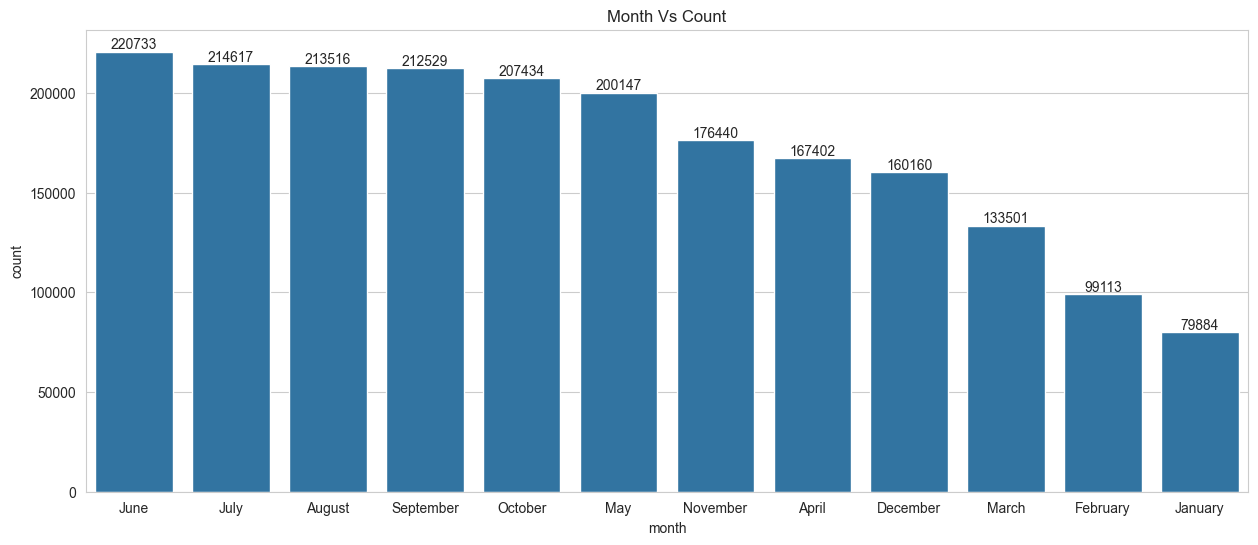

In [237]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month_name()
month_seg = df.groupby('month')['count'].sum().reset_index()
fig, ay = plt.subplots(figsize=(15, 6))

a1 = sns.barplot(data= month_seg , x='month',y='count',ax=ay,order=month_seg.sort_values('count',ascending=False).month)
plt.bar_label(a1.containers[0])
plt.title("Month Vs Count")
plt.show()

**Conclusion:**

*Hune, July, August and September has highest number of user count*

*December, January, Feb and March has lowest number of user count*

# **7. Year vs Count**

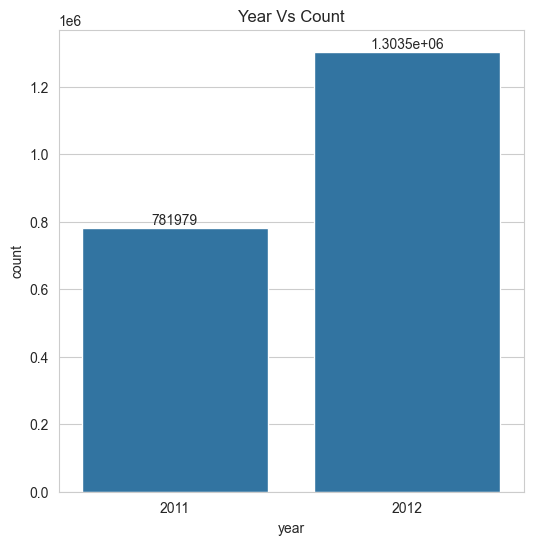

In [238]:

year_seg = df.groupby('year')['count'].sum().reset_index()
fig, ay = plt.subplots(figsize=(6, 6))

a1 = sns.barplot(data= year_seg , x='year',y='count',ax=ay)
plt.bar_label(a1.containers[0])
plt.title("Year Vs Count")
plt.show()

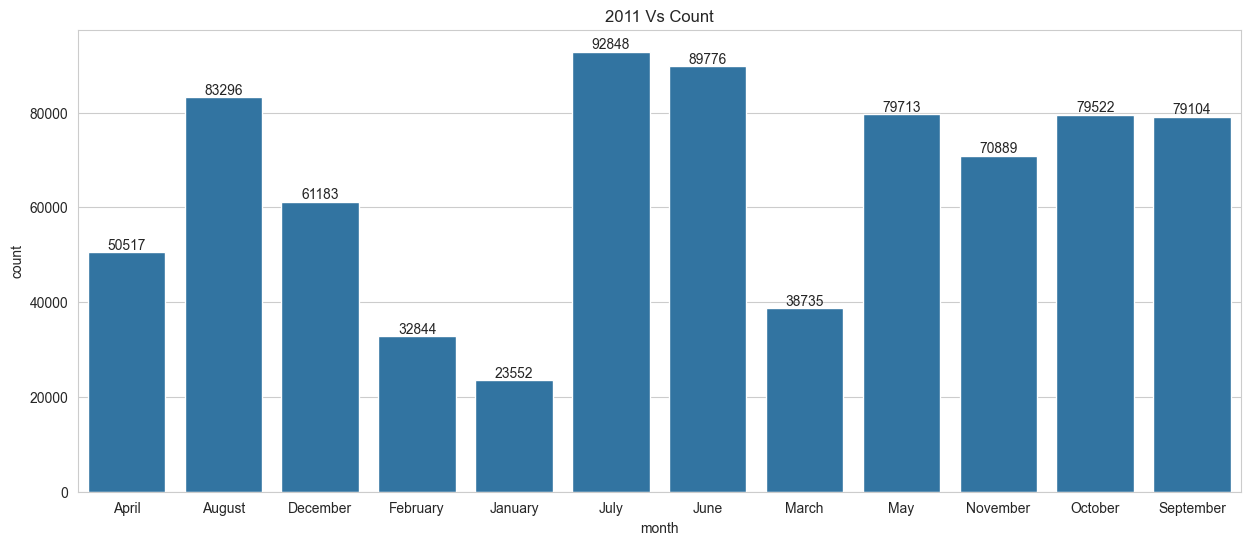

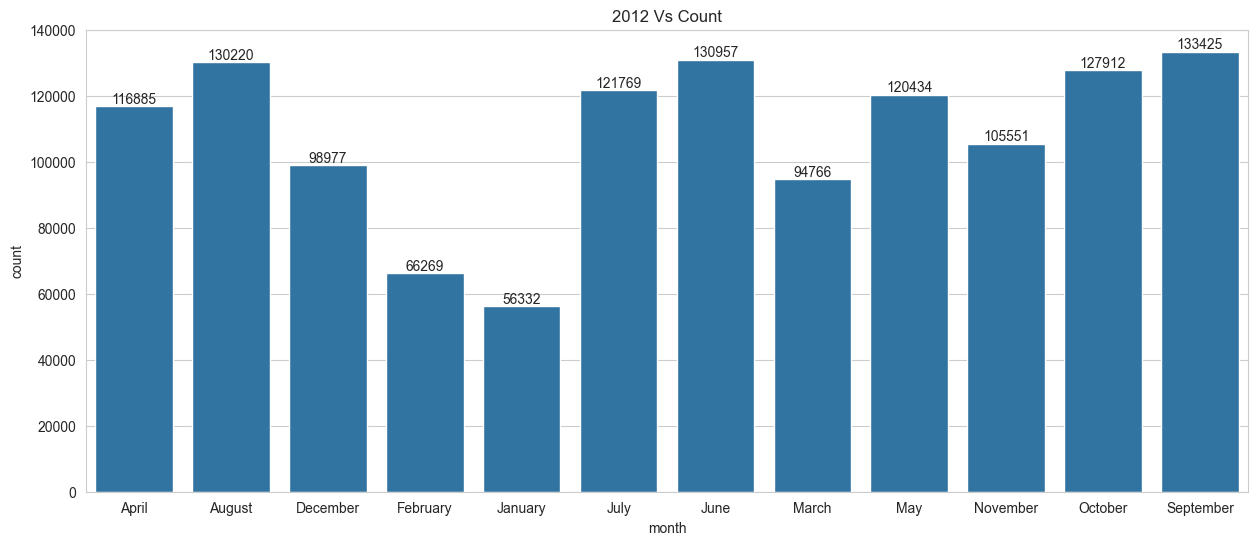

In [239]:
month_seg_2011 = df[df['year']==2011].groupby('month')['count'].sum().reset_index()
fig, ay = plt.subplots(figsize=(15, 6))

a1 = sns.barplot(data= month_seg_2011 , x='month',y='count',ax=ay)
plt.bar_label(a1.containers[0])
plt.title("2011 Vs Count")
plt.show()


month_seg_2012 = df[df['year']==2012].groupby('month')['count'].sum().reset_index()
fig, ay = plt.subplots(figsize=(15, 6))

a1 = sns.barplot(data= month_seg_2012 , x='month',y='count',ax=ay)
plt.bar_label(a1.containers[0])
plt.title("2012 Vs Count")
plt.show()

# **Compare the 2011 and 2012 data and find the which year has highest number of count based on the months**

In [240]:

#Merge the 2 Dataframe 2011 and 2012 data on the common column month
total_data=month_seg_2011.merge(month_seg_2012,on='month')
total_data.rename(columns={'count_x':'count_2011',
                           'count_y':'count_2012'},inplace=True)
total_data.head()

,month,count_2011,count_2012
0,April,50517,116885
1,August,83296,130220
2,December,61183,98977
3,February,32844,66269
4,January,23552,56332


In [241]:
def find_year(x):
    if (x['count_2011'] > x['count_2012']):
        return '2011'
    else:
        return '2012'

def find_count(x):
    if (x['count_2011'] > x['count_2012']):
        return x['count_2011']
    else:
        return x['count_2012']

#Each row is passed into the function and compare the 2011 and 2012 data and will return the result
total_data['result']= total_data[['count_2011','count_2012']].apply(find_year,axis=1)

total_data['result_count']= total_data[['count_2011','count_2012']].apply(find_count,axis=1)

total_data.head()

,month,count_2011,count_2012,result,result_count
0,April,50517,116885,2012,116885
1,August,83296,130220,2012,130220
2,December,61183,98977,2012,98977
3,February,32844,66269,2012,66269
4,January,23552,56332,2012,56332


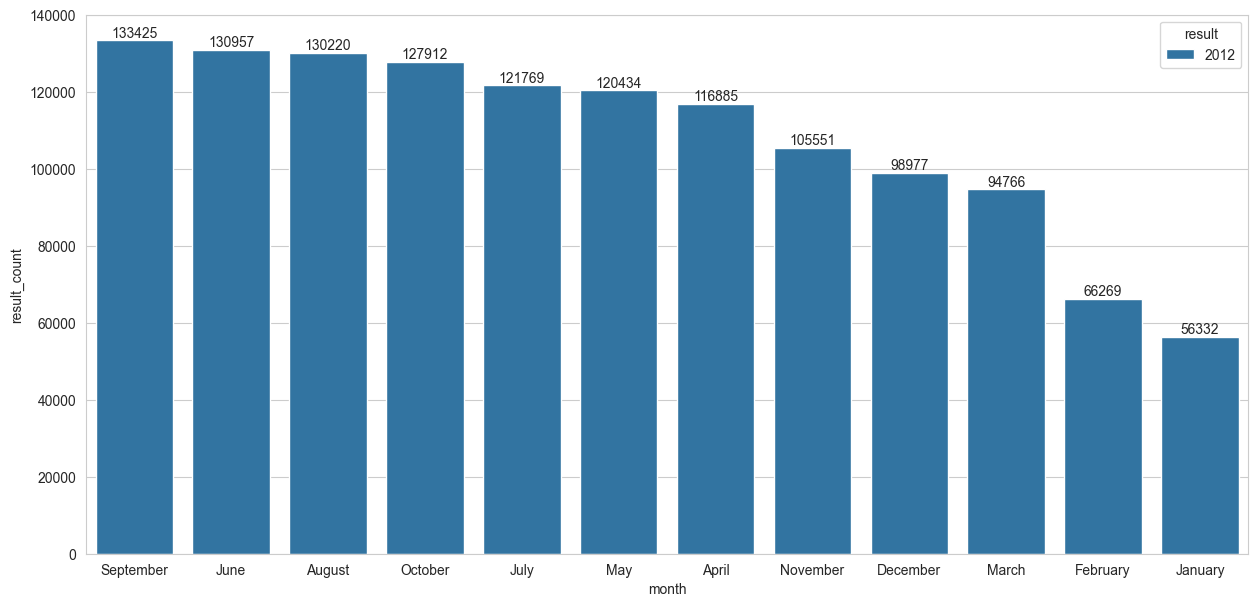

In [242]:
plt.figure(figsize=(15,7))
ax = sns.barplot(data=total_data,x='month',y='result_count',hue='result',order=total_data.sort_values('result_count',ascending=False).month)
plt.bar_label(ax.containers[0])
plt.show()

**Conclusion:**

*All the months -> **2012 data is having highest number of count of users for all the months** and 2011 has low count of users in all the months*

# **Analyse the Count of users based on the Month and Season for 2011 and 2012 data and conclude**

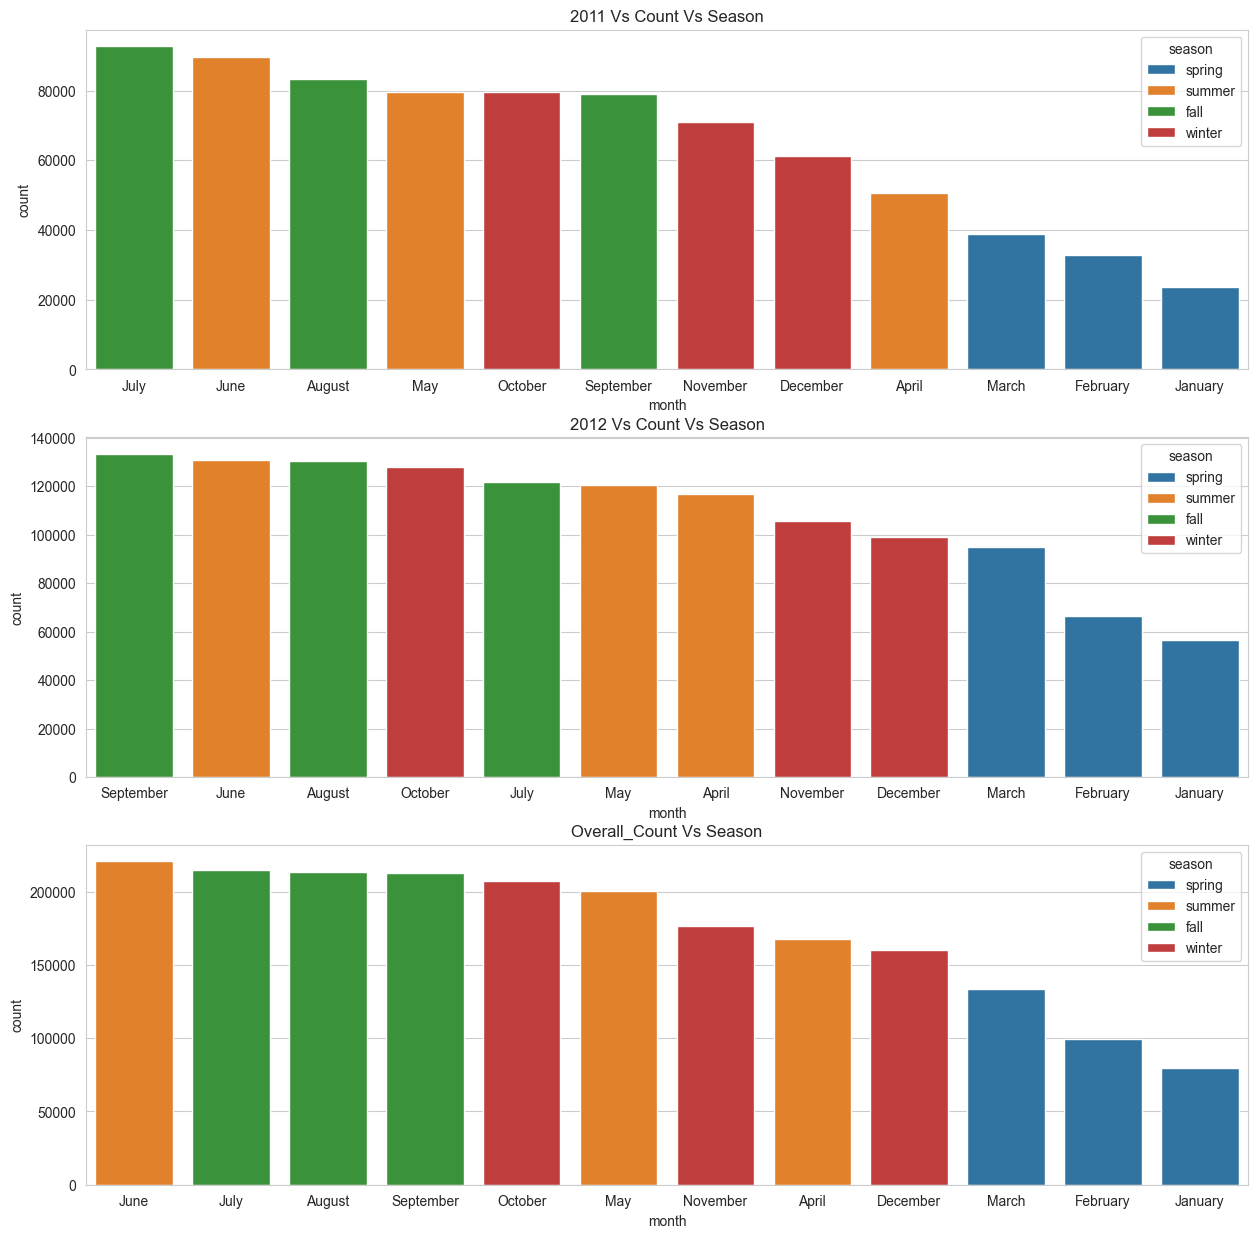

In [243]:
#To create a dataFrame for 2011 data with respect to season
season_2011=df[df['year']==2011].groupby(['month','season'],observed=False)['count'].sum().reset_index()
season_2011 = season_2011[season_2011['count'] !=0]

#To create a dataFrame for 2012 data with respect to season
season_2012=df[df['year']==2012].groupby(['month','season'],observed=False)['count'].sum().reset_index()
season_2012 = season_2012[season_2012['count'] !=0]

#To create a dataFrame for overall season
season_overall=df.groupby(['month','season'],observed=False)['count'].sum().reset_index()
season_overall = season_overall[season_overall['count'] !=0]

fig, axis= plt.subplots(nrows=3,ncols=1,figsize=(15,15))

ax=sns.barplot(data=season_2011,x='month',y='count',hue='season',ax=axis[0],order=season_2011.sort_values('count',ascending=False).month)
axis[0].set_title("2011 Vs Count Vs Season")

ax=sns.barplot(data=season_2012,x='month',y='count',hue='season',order=season_2012.sort_values('count',ascending=False).month,ax=axis[1])
axis[1].set_title("2012 Vs Count Vs Season")

ax = sns.barplot(data=season_overall,x='month',y='count',hue='season',order=season_overall.sort_values('count',ascending=False).month,ax=axis[2])
axis[2].set_title("Overall_Count Vs Season")
plt.show()


**Conclusion:**

*1. During **Winter and Spring** season i.e **November,December, January, Feb and March** 
 the users count is decreased based on the 2011,2012 and overall count.*

*2. During **Fall and Summer** season i.e **April, May, June, July, August, September and start of October** the count is higher*

# **Based on the above conclusion November,December, January, Feb and March are having less user count. So, lets analyse what makes the less user count based on the weather, temperature and humidity**

**1. Based on temperature for the low 5 months**

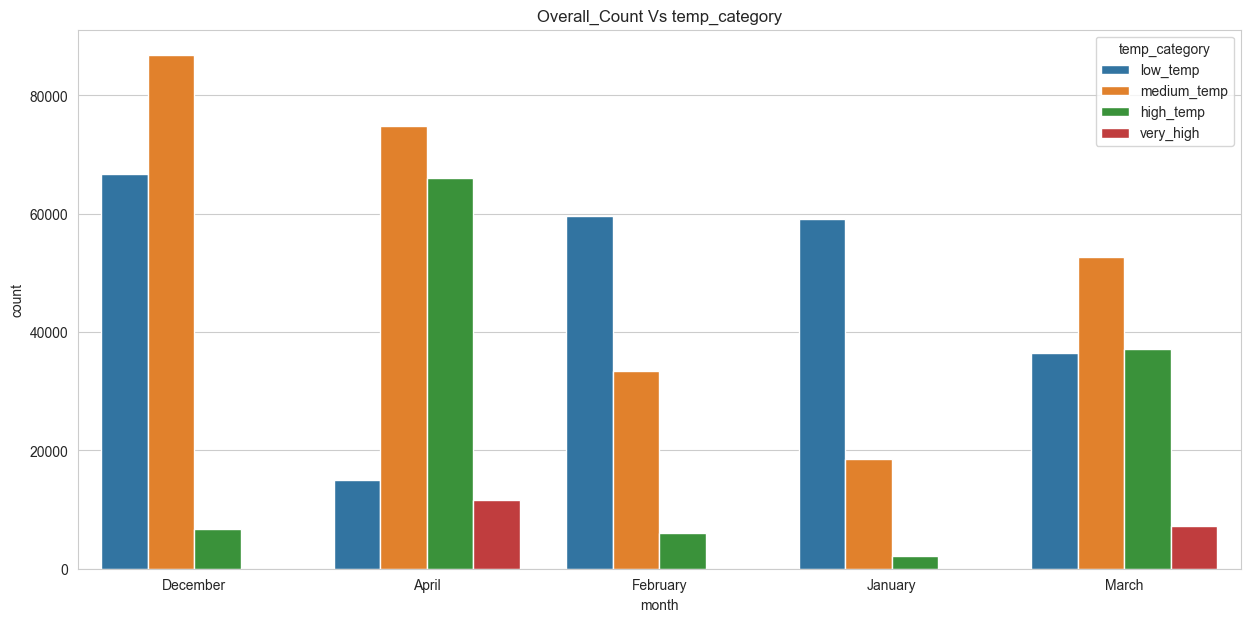

In [244]:

#list of months that needs to be analysed
low_5_months = season_overall.sort_values('count',ascending=True).month.head()

#To create a dataFrame for overall temp
temp_overall=df[df['month'].isin(low_5_months)].groupby(['month','temp_category'],observed=False)['count'].sum().reset_index()
temp_overall = temp_overall[temp_overall['count'] !=0]

plt.figure(figsize=(15,7))
ax = sns.barplot(data=temp_overall,x='month',y='count',hue='temp_category',order=temp_overall.sort_values('count',ascending=False).month)
plt.title("Overall_Count Vs temp_category")
plt.show()

**Conclusion:**

*Based on the temperature category we cannot conclude that temperature affects the user count*

**2. Based on the humidity category**

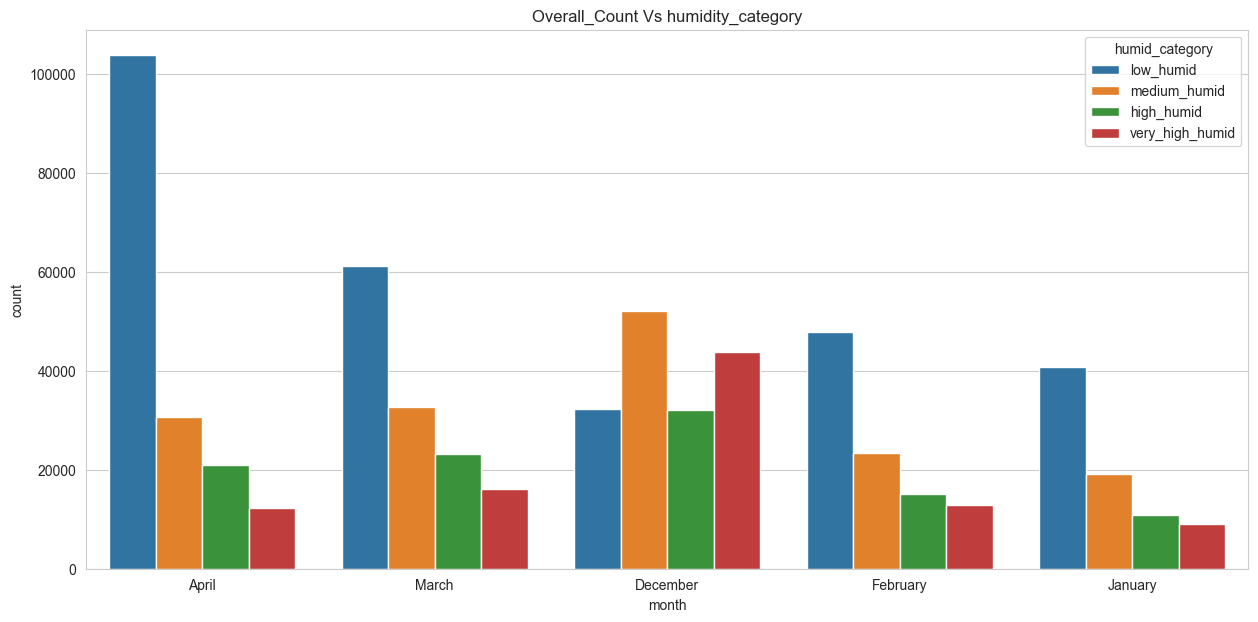

In [245]:
#To create a dataFrame for overall humidity for the low 5 months
humidity_overall=df[df['month'].isin(low_5_months)].groupby(['month','humid_category'],observed=False)['count'].sum().reset_index()
humidity_overall = humidity_overall[humidity_overall['count'] !=0]

plt.figure(figsize=(15,7))
ax = sns.barplot(data=humidity_overall,x='month',y='count',hue='humid_category',order=humidity_overall.sort_values('count',ascending=False).month)
plt.title("Overall_Count Vs humidity_category")
plt.show()

**Conclusion**

*When there is a **low humid** weather **User count is higer** when compared to the other humid weather*

**3.Based on the Weather**

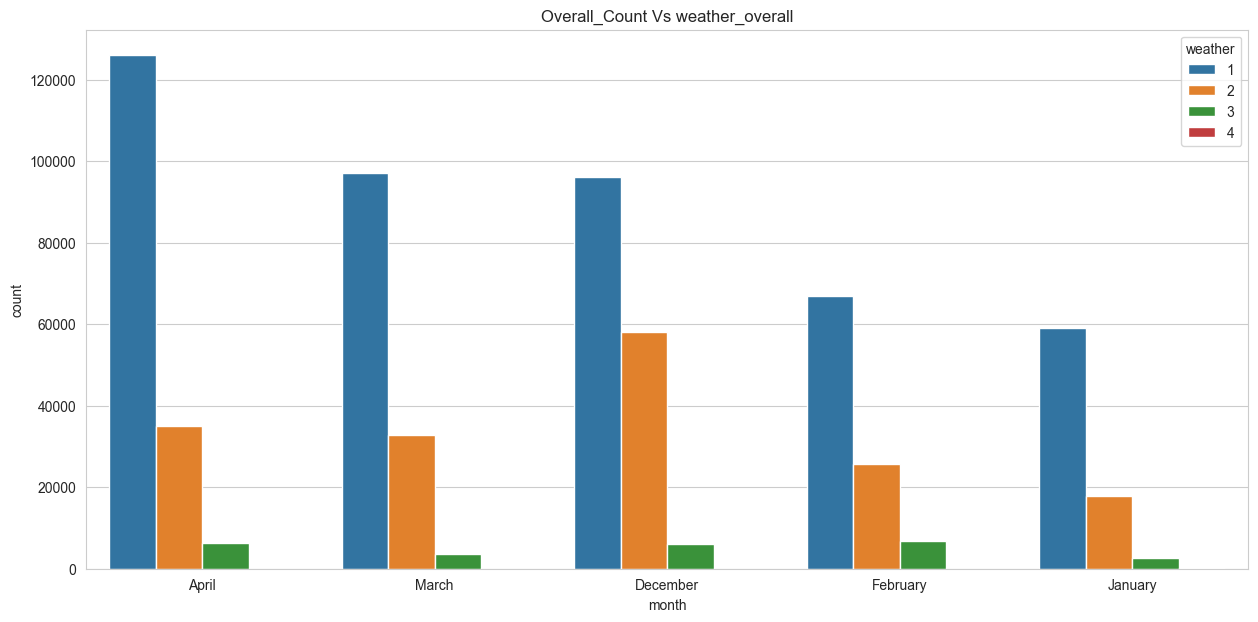

'\nweather:\n1: Clear, Few clouds, partly cloudy, partly cloudy\n2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog\n'

In [246]:
#To create a dataFrame for overall weather for the low 5 months
weather_overall=df[df['month'].isin(low_5_months)].groupby(['month','weather'],observed=False)['count'].sum().reset_index()
weather_overall = weather_overall[weather_overall['count'] !=0]

plt.figure(figsize=(15,7))
ax = sns.barplot(data=weather_overall,x='month',y='count',hue='weather',order=weather_overall.sort_values('count',ascending=False).month)
plt.title("Overall_Count Vs weather_overall")
plt.show()

'''
weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
'''

**Conclusion:**

*Only during the **1: Clear, Few clouds, partly cloudy, partly cloudy and 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist** 
the user count is higher*

**4. Based on holiday**

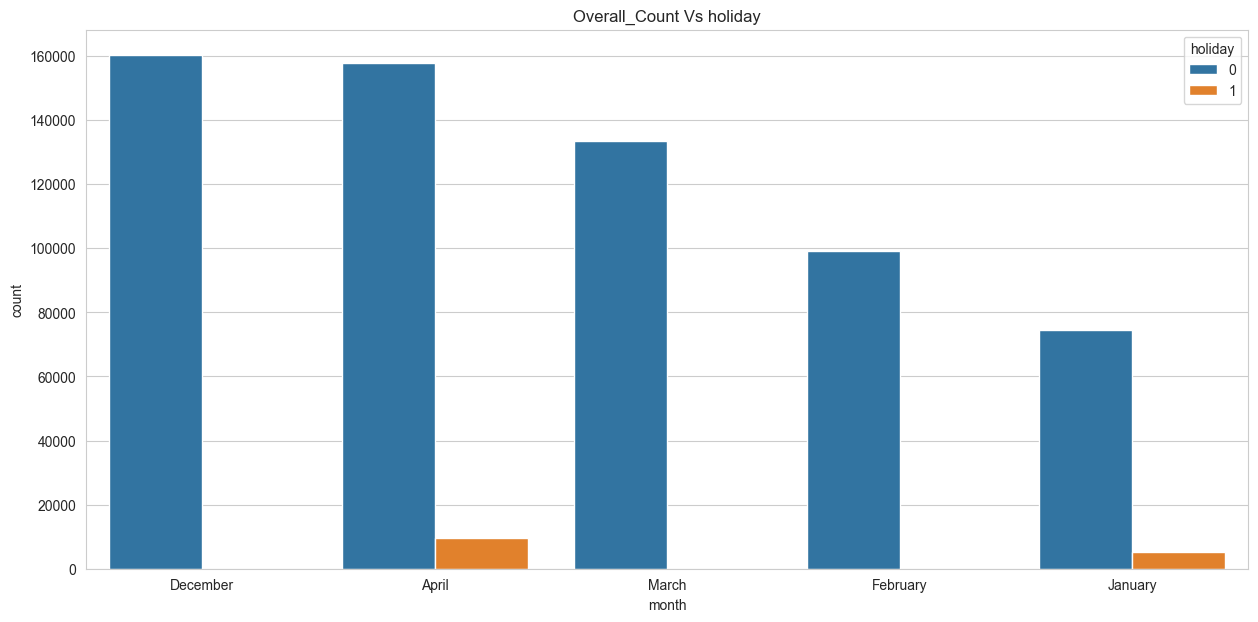

In [247]:
#To create a dataFrame for overall weather for the low 5 months
hols=df[df['month'].isin(low_5_months)].groupby(['month','holiday'],observed=False)['count'].sum().reset_index()
hols = hols[hols['count'] !=0]

plt.figure(figsize=(15,7))
ax = sns.barplot(data=hols,x='month',y='count',hue='holiday',order=hols.sort_values('count',ascending=False).month)
plt.title("Overall_Count Vs holiday")
plt.show()

**Conclusion:**

*Its very clearly shows that the user count is very low or not present during the non
holidays*

# **Count of users vs working day for every month**

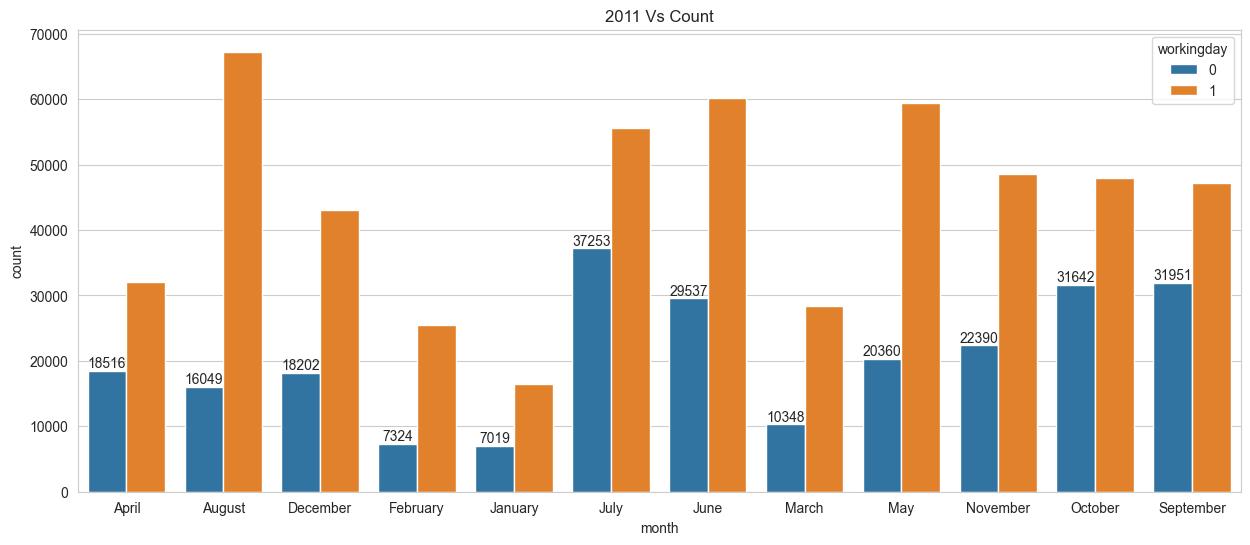

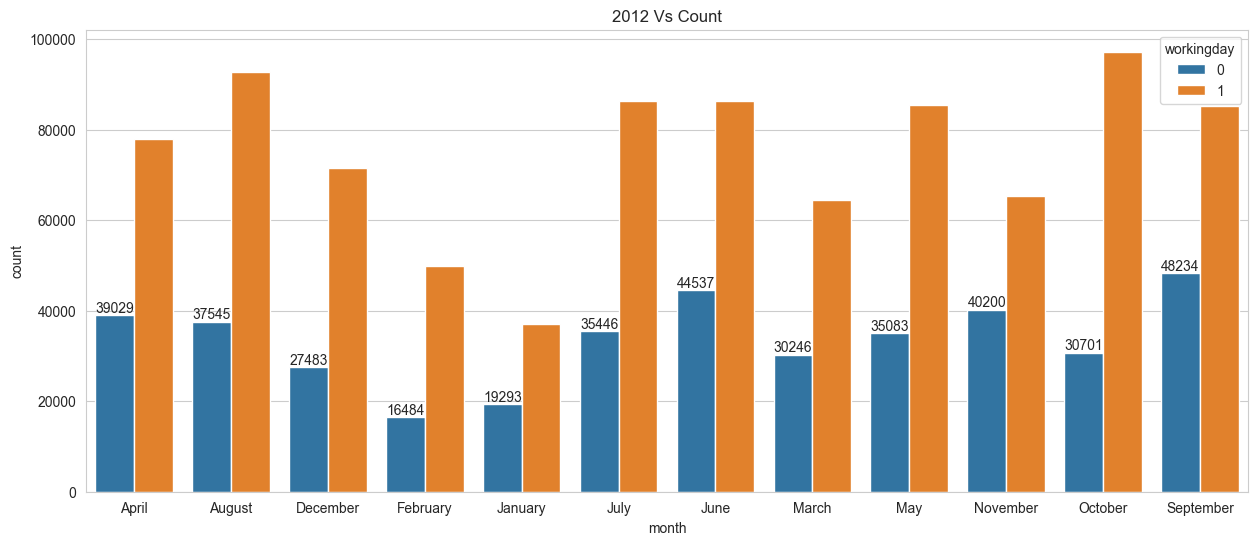

In [248]:
month_seg = df[df['year']==2011].groupby(['month','workingday'],observed=False)['count'].sum().reset_index()
fig, ay = plt.subplots(figsize=(15, 6))

a1 = sns.barplot(data= month_seg , x='month',y='count',ax=ay,hue='workingday')
plt.bar_label(a1.containers[0])
plt.title("2011 Vs Count")
plt.show()

month_seg = df[df['year']==2012].groupby(['month','workingday'],observed=False)['count'].sum().reset_index()
fig, ay = plt.subplots(figsize=(15, 6))

a1 = sns.barplot(data= month_seg , x='month',y='count',ax=ay,hue='workingday')
plt.bar_label(a1.containers[0])
plt.title("2012 Vs Count")
plt.show()

# **Analyse the data based on the time- hour**

In [249]:

df['hour'] = df['datetime'].dt.hour
df['hour']=df['hour'].astype('category')

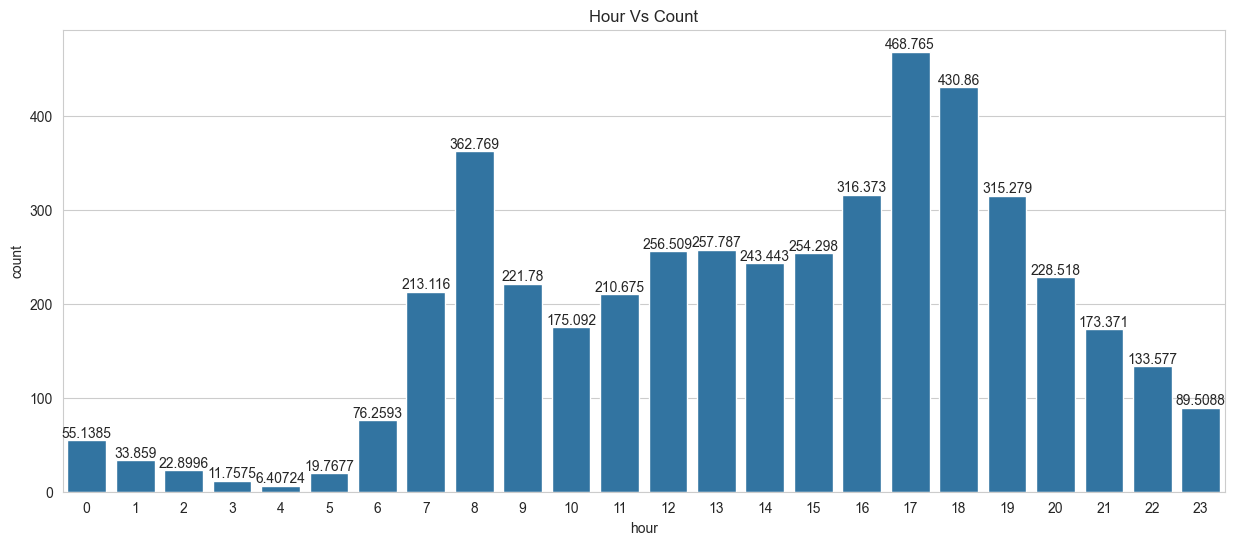

In [250]:
hr_seg = df.groupby('hour',observed=False)['count'].mean().reset_index()
fig, ay = plt.subplots(figsize=(15, 6))

a1 = sns.barplot(data= hr_seg , x='hour',y='count',ax=ay,order=hr_seg.sort_values('hour',ascending=True).hour)
plt.bar_label(a1.containers[0])
plt.title("Hour Vs Count")
plt.show()

**Conclusion:**

*Based on the hours- During the early morning, morning and night times the vehciles rented is less. Yulu has to focus on these hrs to improve the user rentals*

*During afternoon and evening times- there are high peak in the user rental vehicles. Yulu can increase more vehcile to increase the revenue.*

# **=================================================**

# **HYPOTHESIS TESTING**

# **1. T-test**

*To check if Working Day has an effect on the number of electric cycles rented*

In [251]:
# To check if the working day has an effect or not => separated the samples into two parts
# sample_1_workingday_1 => represent the data which are working days
# sample_2_workingday_0 => represent the data which are not working days

sample_1_workingday_1 = df[df['workingday']==1]
sample_2_workingday_0 = df[df['workingday']==0]

In [252]:
print("The mean of sample_1_workingday_1 (mu1) is : ", sample_1_workingday_1['count'].mean())
print("The mean of sample_2_workingday_0 (mu2) is : ", sample_2_workingday_0['count'].mean())

The mean of sample_1_workingday_1 (mu1) is :  193.01187263896384
The mean of sample_2_workingday_0 (mu2) is :  188.50662061024755


*--------------------------------*

*From the above means => mu1 is greater than mu2 (mu1 > mu2) and lets check whether the above data is statiscally significant or not*

*--------------------------------*


**i) Set the Null and Alternate hypothesis**

*H0: The working day has no effect on the number of cycles rented (mu1 = mu2)*

*Ha: The working day has an effect on the number of cycles rented (mu1 > mu2)*

*--------------------------------------------------*

**ii) Choose the distribution**

**2 Sample independent T-Test** is used to verify the hypothesis testing

*--> The population mean and population standard deviation is not given.*

*--> 2 Samples are given for analysis.*

*--> 2 Samples are independent on each other.*

*--------------------------------------------------*

**iii) Set a significance level (alpha)**

**alpha = 0.05**

Since there is no confidence interval provided as per the business standard we selected the **95% confidence interval** i.e **(1-0.95) => 0.05** significance value (alpha).

*--------------------------------------------------*

**iv) Compute the p-value**

In [253]:


alpha = 0.05
t_stats, p_value = ttest_ind(sample_1_workingday_1['count'],sample_2_workingday_0['count'],alternative= "greater")

print(f"The computed p_value from the independent ttest is :{p_value}")
print("="*50)

if p_value < alpha:
    print("The Null Hypothesis is rejected => The working day has an effect on the number of cycles rented (mu1 > mu2)")
else:
    print("Failed to reject the Null Hypothesis => The mean of working day and the non-working day are statistically same and working day has no effect on the number of cycles rented (mu1 = mu2) statistically")
print("="*50)


The computed p_value from the independent ttest is :0.11322402113180674
Failed to reject the Null Hypothesis => The mean of working day and the non-working day are statistically same and working day has no effect on the number of cycles rented (mu1 = mu2) statistically


**v) Conclusion:**

*--> The p_value is 0.113 which is greater than the significance value 0.05*

*--> The mean of working day and the non-working day are statistically same and working day has no effect on the number of cycles rented (mu1 = mu2) statistically*


# **To check if holiday has an effect on the number of electric cycles rented**

In [254]:
sample_1_holiday_1 = df[df['holiday']==1]
sample_2_holiday_0 = df[df['holiday']==0]
print("The mean of sample_1_holiday_1 (mu1) is : ", sample_1_holiday_1['count'].mean())
print("The mean of sample_2_holiday_0 (mu2) is : ", sample_2_holiday_0['count'].mean())



The mean of sample_1_holiday_1 (mu1) is :  185.87781350482314
The mean of sample_2_holiday_0 (mu2) is :  191.7416548463357


In [255]:
alpha = 0.05
t_stats, p_value = ttest_ind(sample_1_holiday_1['count'],sample_2_holiday_0['count'],alternative= "less")

print(f"The computed p_value from the independent ttest is :{p_value}")
print("="*50)

if p_value < alpha:
    print("The Null Hypothesis is rejected => The holiday has an effect on the number of cycles rented (mu1 < mu2)")
else:
    print("Failed to reject the Null Hypothesis => The mean of rented vehicle count is approx equal and the holiday/non-holidays has no effect on the number of cycles rented (mu1 = mu2) statistically")
print("="*50)

The computed p_value from the independent ttest is :0.28684619416355517
Failed to reject the Null Hypothesis => The mean of rented vehicle count is approx equal and the holiday/non-holidays has no effect on the number of cycles rented (mu1 = mu2) statistically


# **To check if fall season or spring season has an effect on the number of electric cycles rented**

In [256]:
sample_1_season_fall = df[df['season']=='fall']
sample_2_season_spring = df[df['season']=='spring']
print("The mean of sample_1_season_fall (mu1) is : ", sample_1_season_fall['count'].mean())
print("The mean of sample_2_season_spring (mu2) is : ", sample_2_season_spring['count'].mean())
alpha = 0.05
t_stats, p_value = ttest_ind(sample_1_season_fall['count'],sample_2_season_spring['count'],alternative= "greater")

print(f"The computed p_value from the independent ttest is :{p_value}")
print("="*50)

if p_value < alpha:
    print("The Null Hypothesis is rejected with 0.05 significance (both the means are not same) => The mean of vehicle rented during the fall season has an effect on the number of cycles rented compared to the spring season(mu1 > mu2)")
else:
    print("Failed to reject the Null Hypothesis with 0.05 significance (both means are almost same statistically) => The mean of rented vehicle count is approx equal and the spring/fall season has no effect on the number of cycles rented (mu1 = mu2) statistically")
print("="*50)


The mean of sample_1_season_fall (mu1) is :  234.417124039517
The mean of sample_2_season_spring (mu2) is :  116.34326135517499
The computed p_value from the independent ttest is :1.7019252177655487e-143
The Null Hypothesis is rejected with 0.05 significance (both the means are not same) => The mean of vehicle rented during the fall season has an effect on the number of cycles rented compared to the spring season(mu1 > mu2)


# **To check if temperature, humidity has an effect on the number of electric cycles rented**

In [257]:
# high temperature Vs low temperature
sample_1_low_temp = df[df['temp_category'].isin(['low_temp','medium_temp'])]
sample_2_very_high = df[df['temp_category'].isin(['high_temp','very_high'])]
print("The mean of sample_1_low_temp (mu1) is : ", sample_1_low_temp['count'].mean())
print("The mean of sample_2_very_high (mu2) is : ", sample_2_very_high['count'].mean())
alpha = 0.05
t_stats, p_value = ttest_ind(sample_1_low_temp['count'],sample_2_very_high['count'],alternative= "less")

print(f"The computed p_value from the independent ttest is :{p_value}")
print("="*50)

if p_value < alpha:
    print("The Null Hypothesis is rejected with 0.05 significance (both the means are not same) =>\nThe mean of vehicle rented during the low temperature has an effect on the number of cycles rented compared to the high temp (mu1 < mu2)")
else:
    print("Failed to reject the Null Hypothesis with 0.05 significance (both means are almost same statistically) =>\nThe mean of rented vehicle count is approx equal and the low/high temp has no effect on the number of cycles rented (mu1 = mu2) statistically")
print("="*50)

print("*"*70)
print("*"*70)

# high humidity vs Low humidity
sample_1_low_humid = df[df['humid_category'].isin(['low_humid','medium_humid'])]
sample_2_high_humid = df[df['humid_category'].isin(['very_high_humid','high_humid'])]
print("The mean of sample_1_low_humid (mu1) is : ", sample_1_low_humid['count'].mean())
print("The mean of sample_2_high_humid (mu2) is : ", sample_2_high_humid['count'].mean())
alpha = 0.05
t_stats, p_value = ttest_ind(sample_1_low_humid['count'],sample_2_high_humid['count'],alternative= "greater")

print(f"The computed p_value from the independent ttest is :{p_value}")
print("="*50)

if p_value < alpha:
    print("The Null Hypothesis is rejected with 0.05 significance (both the means are not same) =>\nThe mean of vehicle rented during the high humid has an effect on the number of cycles rented compared to the low humid(mu1 > mu2)")
else:
    print("Failed to reject the Null Hypothesis with 0.05 significance (both means are almost same statistically) =>\nThe mean of rented vehicle count is approx equal and the slow/high humid has no effect on the number of cycles rented (mu1 = mu2) statistically")
print("="*50)

The mean of sample_1_low_temp (mu1) is :  137.07760296977196
The mean of sample_2_very_high (mu2) is :  250.62674574325618
The computed p_value from the independent ttest is :1.341520003486533e-246
The Null Hypothesis is rejected with 0.05 significance (both the means are not same) =>
The mean of vehicle rented during the low temperature has an effect on the number of cycles rented compared to the high temp (mu1 < mu2)
**********************************************************************
**********************************************************************
The mean of sample_1_low_humid (mu1) is :  239.7814569536424
The mean of sample_2_high_humid (mu2) is :  141.21546333143831
The computed p_value from the independent ttest is :9.174915758297271e-184
The Null Hypothesis is rejected with 0.05 significance (both the means are not same) =>
The mean of vehicle rented during the high humid has an effect on the number of cycles rented compared to the low humid(mu1 > mu2)


# **=================================================**

# **ANNOVA TEST**

# **ANNOVA to check if No. of cycles rented is similar or different in different** 

# **1. Season**

In [258]:
season_1= df[df['season']=='spring']['count']
season_2= df[df['season']=='winter']['count']
season_3= df[df['season']=='fall']['count']
season_4= df[df['season']=='summer']['count']


f_statistic, p_value = f_oneway(season_1, season_2, season_3,season_4)

print(f"The p-value for the ANNOVA test is {(p_value)} with 0.05 significance value")

if p_value < alpha:
    print("Reject the Null Hypothesis: The mean of seasons are different statistically.\nHence, the number of cycles rented is affected by the seasons")
else:
    print("Failed to Reject H0: Number of cycles rented is almost similar in all the seasons")
    

The p-value for the ANNOVA test is 6.164843386499654e-149 with 0.05 significance value
Reject the Null Hypothesis: The mean of seasons are different statistically.
Hence, the number of cycles rented is affected by the seasons


# **2. weather**

In [259]:
weather_1= df[df['weather']==1]['count']
weather_2= df[df['weather']==2]['count']
weather_3= df[df['weather']==3]['count']


f_statistic, p_value = f_oneway(weather_1, weather_2, weather_3)

print(f"The p-value for the ANNOVA test is {(p_value)} with 0.05 significance value")


if p_value < alpha:
    print(f"The p-value is: {p_value}")
    print("Reject H0: Number of cycles rented is not similar in all the weather condition and Weather has an impact on the user vehicle count")
else:
    print("Failed to Reject H0: Number of cycles rented is almost similar in all the weather condition")
    

The p-value for the ANNOVA test is 4.976448509904196e-43 with 0.05 significance value
The p-value is: 4.976448509904196e-43
Reject H0: Number of cycles rented is not similar in all the weather condition and Weather has an impact on the user vehicle count


**Conclusion:**

***For Season:** Failed to Reject H0: Number of cycles rented is almost similar in all the seasons*

**For Weather:** Reject H0: Number of cycles rented is not similar in all the weather condition**

# **Levene's Test**

In [260]:
#Null Hypothesis: Variances is similar in different weather and season.

#Alternate Hypothesis: Variances is not similar in different weather and season.

#Significance level (alpha): 0.05

gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values

gp5 = df[df['season']=='spring']['count'].values
gp6 = df[df['season']=='fall']['count'].values
gp7 = df[df['season']=='summer']['count'].values
gp8 = df[df['season']=='winter']['count'].values

groups=[gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8]

levene_stat, p_value = levene(gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8)
# Print the test statistic and p-value
print("Levene's test statistic:", levene_stat)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("Homogeneity of variances (fail to reject H0) - the variances are equal across groups")
else:
    print("Heterogeneity of variances (reject H0) - indicating that the variances are not equal across groups")

Levene's test statistic: 102.50263063041479
p-value: 3.4635318889066514e-148
Heterogeneity of variances (reject H0) - indicating that the variances are not equal across groups


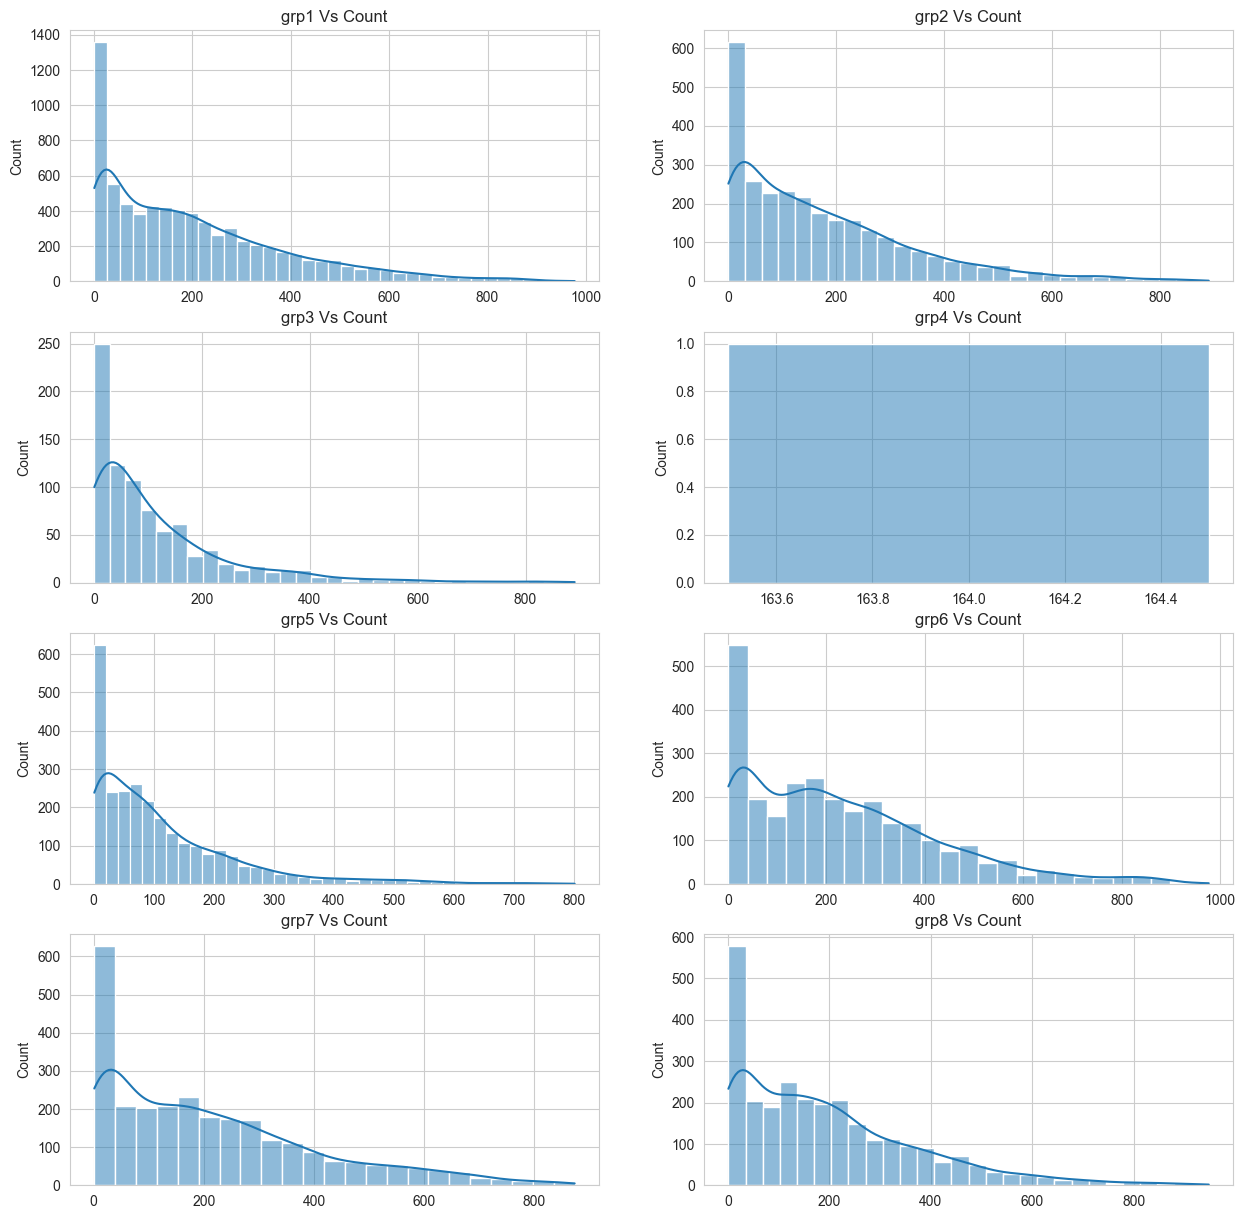

In [261]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

index = 0
for row in range(4):
    for col in range(2):
        sns.histplot(groups[index], ax=axis[row, col], kde=True)
        axis[row, col].set_title(f"grp{index+1} Vs Count")
        index += 1

plt.show()

# **Q-Q Plot**

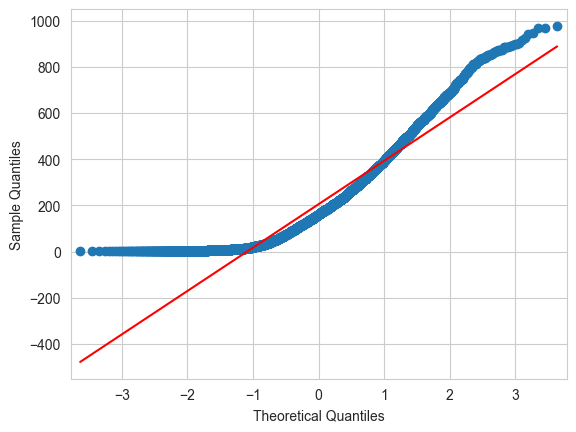

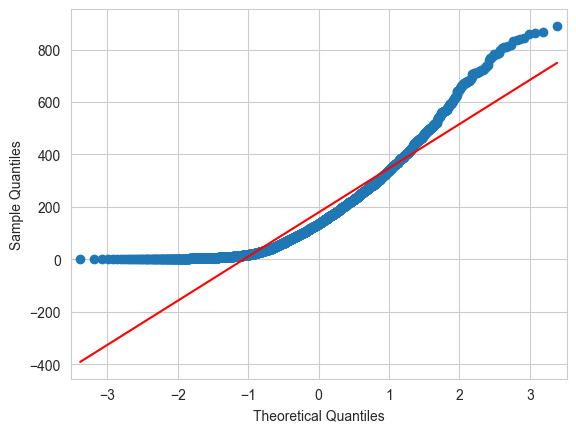

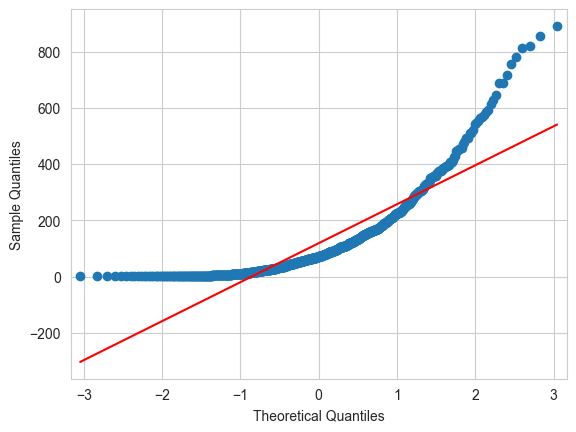

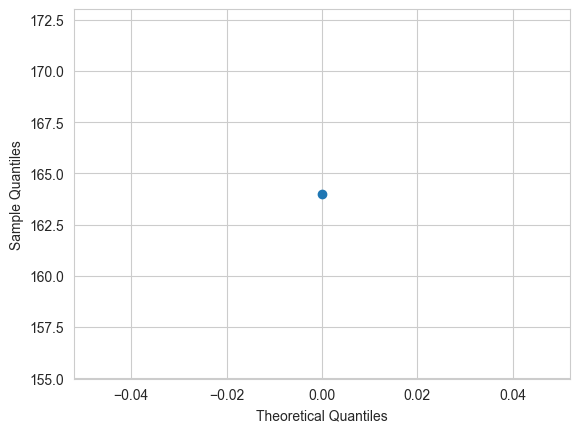

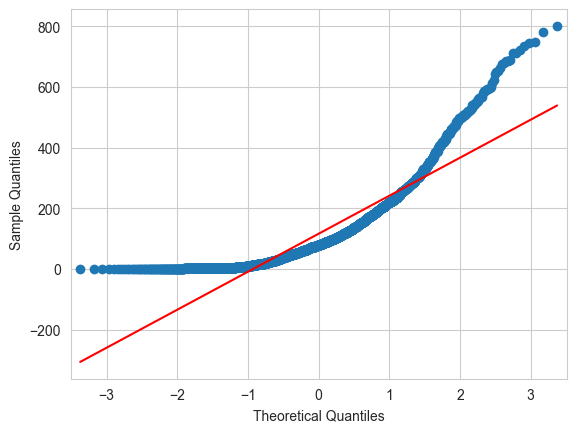

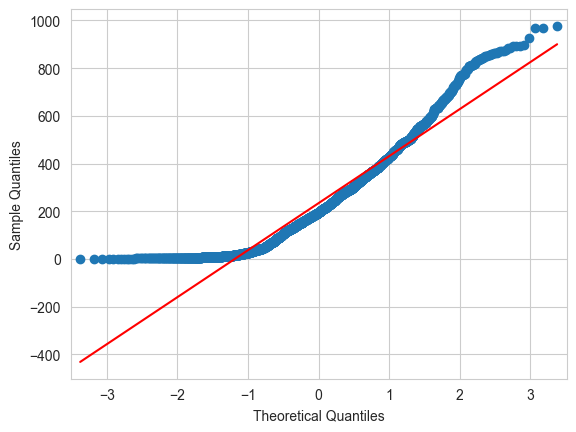

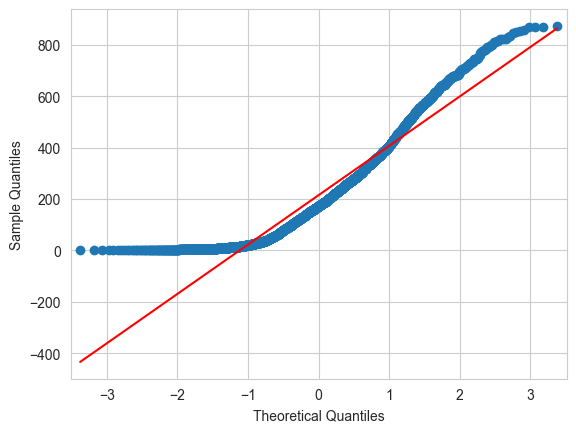

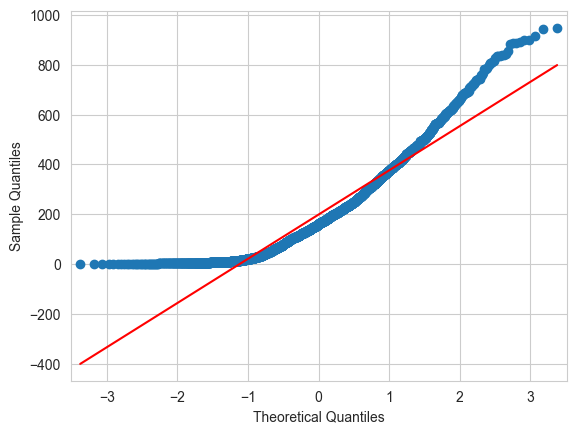

In [262]:
index = 0
for row in range(4):
    for col in range(2):
        qqplot(groups[index], line="s")
        index += 1

plt.show()

**Conclusion:**

*Based on the Q-Q plot all the weather and season data sets are not normally distributed*

# **CHISQUARE TEST**

**Chi-square test to check if Weather is dependent on the season**

In [263]:
x=pd.crosstab(df['season'],df['weather'])
x

weather,1,2,3,4
season,,,,
spring,1759,715,211,1
summer,1801,708,224,0
fall,1930,604,199,0
winter,1702,807,225,0


In [264]:
chi2, p, dof, expected = chi2_contingency(x)

# Display the test statistics and p-value
print("\nChi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(expected)


Chi-square Statistic: 49.158655596893624
P-value: 1.549925073686492e-07
Degrees of Freedom: 9

Expected Frequencies:
[[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]


In [265]:
if p < alpha:
    print("Reject the H0: The weather has an influence on the season")
else:
    print("Not to Reject the H0: The weather is independent on the season")

Reject the H0: The weather has an influence on the season


# **Conclusion and Final Insights**

*1. Using t-test with 95% confidence, the mean of working day and the non-working day are statistically same and **working day has no effect on the number of cycles rented** (mu1 = mu2) statistically. Yulu can ignore the focus on taregting the working and non-working days.*

*2. Using t-test with 95% confidence, The mean of vehicle rented during the **low temperature affects the number of cycles rented** compared to the high temp (mu1 < mu2). The Null Hypothesis is rejected with 0.05 significance (both the means are not same). Yulu has pay attention to the weather, temperature and humidity conditions)

*3. Using t-test with 95% confidence, The mean of vehicle rented during the **high humid has an effect on the number of cycles rented compared to the low humid**(mu1 > mu2)The Null Hypothesis is rejected with 0.05 significance (both the means are not same))

*4. Using ANNOVA test with 5% alpha value-> **For Season:** Failed to Reject H0: Number of cycles rented is almost similar in all the seasons and has no impact. **For Weather:** Reject H0: Number of cycles rented is not similar in all the weather condition. So, weather affects the cycles rented*

*5. Using chisquare test with 5% alpha value, Reject the Null Hypothese: The weather has an influence on the season


*6. During **Winter and Spring** season i.e **November,December, January, Feb and March** 
 the users count is decreased based on the 2011,2012 and overall count. Hence Yulu has to focus on the Winter and Spring season to increase the rentel user count*

*7. During **Fall and Summer** season i.e **April, May, June, July, August, September and start of October** the count is higher*

*8. Holidays and weather is the major reason for the decrease in the vehicle rentals during these **November,December, January, Feb and March** months*

*9. Based on the hours- During the **early morning, morning and night times** the vehciles rented is less. Yulu has to focus on these hrs to improve the user rentals*
*10. 
Durin**g afternoon and evening tim**es- there are high peak in the user rental vehicles. Yulu can increase more vehcile to increase the revenu*
e.*11*9
*1. **Based on the Uni and Bi-varient Analysis***

*i). **Season fall** ->high count of users and **Season Spring** ->low count of users*

*ii). **Clear, Few clouds, partly cloudy, partly cloudy** weather -> high count of users and **Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog** weather -> low count of users*

*iii). During the **non holiday and Working days** the count of users are very high*

*iv). During the **holidays** the user count is very low*

*v). During **high and very high temperature** the count of users are more and the count of users are very less during **low temp***

*vi). During **low humid** the count of users are morhs*
